In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.shape

(1460, 81)

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

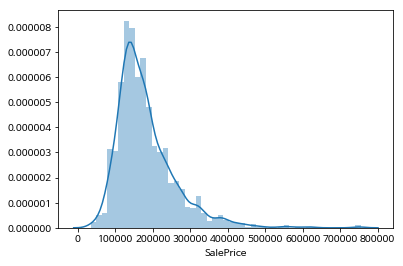

In [6]:
sns.distplot(df_train['SalePrice'])

# 비대칭도
* [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)
* 확률 이론 및 통계학에서, 비대칭도(非對稱度, skewness) 또는 왜도(歪度)실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

In [7]:
# 비대칭도
df_train.skew?

Signature: df_train.skew(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
Docstring:
Return unbiased skew over requested axis
Normalized by N-1

Parameters
----------
axis : {index (0), columns (1)}
skipna : boolean, default True
    Exclude NA/null values. If an entire row/column is NA or empty, the result
    will be NA
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series
numeric_only : boolean, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.

Returns
-------
skew : Series or DataFrame (if level specified)
File:      ~/codes/jupyter/lib/python3.6/site-packages/pandas/core/generic.py
Type:      method


## 첨도
* [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)
* 첨도(尖度, 영어: kurtosis 커토시스[*])는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다

In [8]:
# [통계]첨도(尖度): 도수 곡선(度數曲線)의 최빈치(最頻値)를 중심으로 하는 부분의 완만함·뾰족함의 정도를 나타내는 수치.
df_train.kurt?

Signature: df_train.kurt(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
Docstring:
Return unbiased kurtosis over requested axis using Fisher's definition of
kurtosis (kurtosis of normal == 0.0). Normalized by N-1


Parameters
----------
axis : {index (0), columns (1)}
skipna : boolean, default True
    Exclude NA/null values. If an entire row/column is NA or empty, the result
    will be NA
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series
numeric_only : boolean, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.

Returns
-------
kurt : Series or DataFrame (if level specified)
File:      ~/codes/jupyter/lib/python3.6/site-packages/pandas/core/generic.py
Type:      method


In [9]:
print("왜도(Skewness): %f" % df_train['SalePrice'].skew())
print("첨도(Kurtosis): %f" % df_train['SalePrice'].kurt())

왜도(Skewness): 1.882876
첨도(Kurtosis): 6.536282


## 컬럼 설명 가져오기

In [10]:
desc = [
'SalePrice : the property\'s sale price in dollars. This is the target variable that you\'re trying to predict.',
'MSSubClass: The building class',
'MSZoning: The general zoning classification',
'LotFrontage: Linear feet of street connected to property',
'LotArea: Lot size in square feet',
'Street: Type of road access',
'Alley: Type of alley access',
'LotShape: General shape of property',
'LandContour: Flatness of the property',
'Utilities: Type of utilities available',
'LotConfig: Lot configuration',
'LandSlope: Slope of property',
'Neighborhood: Physical locations within Ames city limits',
'Condition1: Proximity to main road or railroad',
'Condition2: Proximity to main road or railroad (if a second is present)',
'BldgType: Type of dwelling',
'HouseStyle: Style of dwelling',
'OverallQual: Overall material and finish quality',
'OverallCond: Overall condition rating',
'YearBuilt: Original construction date',
'YearRemodAdd: Remodel date',
'RoofStyle: Type of roof',
'RoofMatl: Roof material',
'Exterior1st: Exterior covering on house',
'Exterior2nd: Exterior covering on house (if more than one material)',
'MasVnrType: Masonry veneer type',
'MasVnrArea: Masonry veneer area in square feet',
'ExterQual: Exterior material quality',
'ExterCond: Present condition of the material on the exterior',
'Foundation: Type of foundation',
'BsmtQual: Height of the basement',
'BsmtCond: General condition of the basement',
'BsmtExposure: Walkout or garden level basement walls',
'BsmtFinType1: Quality of basement finished area',
'BsmtFinSF1: Type 1 finished square feet',
'BsmtFinType2: Quality of second finished area (if present)',
'BsmtFinSF2: Type 2 finished square feet',
'BsmtUnfSF: Unfinished square feet of basement area',
'TotalBsmtSF: Total square feet of basement area',
'Heating: Type of heating',
'HeatingQC: Heating quality and condition',
'CentralAir: Central air conditioning',
'Electrical: Electrical system',
'1stFlrSF: First Floor square feet',
'2ndFlrSF: Second floor square feet',
'LowQualFinSF: Low quality finished square feet (all floors)',
'GrLivArea: Above grade (ground) living area square feet',
'BsmtFullBath: Basement full bathrooms',
'BsmtHalfBath: Basement half bathrooms',
'FullBath: Full bathrooms above grade',
'HalfBath: Half baths above grade',
'Bedroom: Number of bedrooms above basement level',
'Kitchen: Number of kitchens',
'KitchenQual: Kitchen quality',
'TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)',
'Functional: Home functionality rating',
'Fireplaces: Number of fireplaces',
'FireplaceQu: Fireplace quality',
'GarageType: Garage location',
'GarageYrBlt: Year garage was built',
'GarageFinish: Interior finish of the garage',
'GarageCars: Size of garage in car capacity',
'GarageArea: Size of garage in square feet',
'GarageQual: Garage quality',
'GarageCond: Garage condition',
'PavedDrive: Paved driveway',
'WoodDeckSF: Wood deck area in square feet',
'OpenPorchSF: Open porch area in square feet',
'EnclosedPorch: Enclosed porch area in square feet',
'3SsnPorch: Three season porch area in square feet',
'ScreenPorch: Screen porch area in square feet',
'PoolArea: Pool area in square feet',
'PoolQC: Pool quality',
'Fence: Fence quality',
'MiscFeature: Miscellaneous feature not covered in other categories',
'MiscVal: $Value of miscellaneous feature',
'MoSold: Month Sold',
'YrSold: Year Sold',
'SaleType: Type of sale',
'SaleCondition: Condition of sale',
]

In [11]:
column_desc = pd.DataFrame(desc)
column_desc.columns = ['desc']
column_desc['col_key'] = column_desc.desc.apply(lambda x : x.split(':')[0])
column_desc['val'] = column_desc.desc.apply(lambda x : x.split(':')[1])
column_desc.head()

,desc,col_key,val
0,SalePrice : the property's sale price in dolla...,SalePrice,the property's sale price in dollars. This is...
1,MSSubClass: The building class,MSSubClass,The building class
2,MSZoning: The general zoning classification,MSZoning,The general zoning classification
3,LotFrontage: Linear feet of street connected t...,LotFrontage,Linear feet of street connected to property
4,LotArea: Lot size in square feet,LotArea,Lot size in square feet


In [12]:
# 컬럼명에 대한 설명 가져오기
def get_col_desc(col_name):
    return column_desc.loc[column_desc['col_key'] == col_name]['val'].values[0]

In [13]:
# 컬럼명을 잘 가져오는지 확인
print(get_col_desc('GrLivArea'))

 Above grade (ground) living area square feet


# SalePrice

## Relationship with numerical variables

Text(0.5,1,' Above grade (ground) living area square feet')

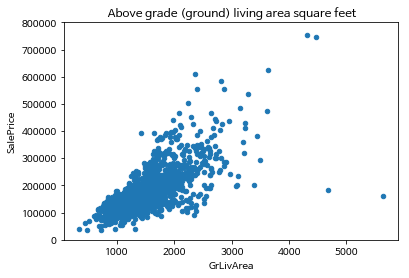

In [14]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.title(get_col_desc(var))

Text(0.5,1,' Total square feet of basement area')

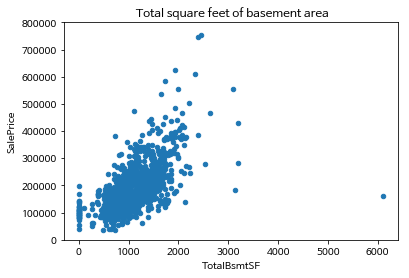

In [15]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.title(get_col_desc(var))

## Relationship with categorical features

Text(0.5,1,' Overall material and finish quality')

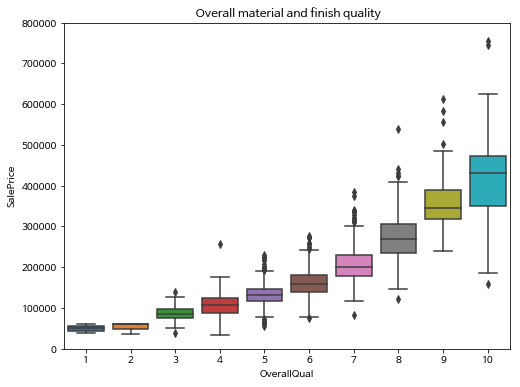

In [16]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.title(get_col_desc(var))